這部份表示修復動作的覆蓋多寡，是否與修復補丁數量有關。  
H0：表示修復動作與生成補丁數量無關  
H1：表示修復動作與生成補丁數量有關  
若是p-value小於0.05，表示拒絕虛無假設，H1為真。  

皮爾森相關係數 (r): 0.8585559917251315
p-value: 0.01337173604738956
拒絕虛無假設 H0，有統計證據支持修復動作與補丁數量有線性關聯。


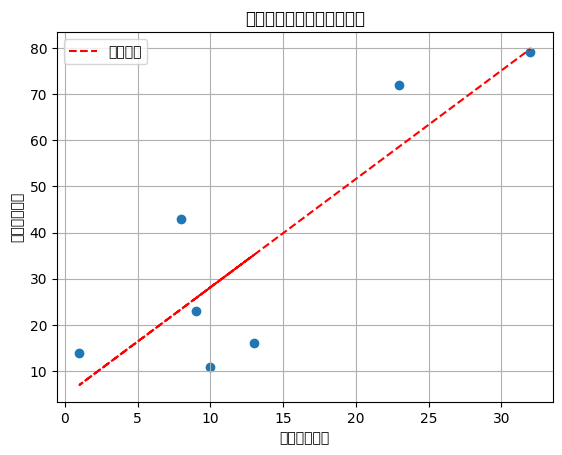

In [ ]:
# 皮爾森判定

import scipy.stats as stats
import matplotlib.pyplot as plt

# 資料
# tools = ['ACS', 'jGenProg', 'jKali', 'jMutRepair', 'Nopol', 'SimFix', 'TBar', 'manual']
# repair_actions = [9, 13, 10, 1, 8, 23, 32, 50]
# patches_generated = [23, 16, 11, 14, 43, 72, 79, 357]

tools = ['ACS', 'jGenProg', 'jKali', 'jMutRepair', 'Nopol', 'SimFix', 'TBar']
repair_actions = [9, 13, 10, 1, 8, 23, 32]
patches_generated = [23, 16, 11, 14, 43, 72, 79]

# 皮爾森相關係數與 p-value
correlation, p_value = stats.pearsonr(repair_actions, patches_generated)

print("皮爾森相關係數 (r):", correlation)
print("p-value:", p_value)

# 解釋結果
alpha = 0.05
if p_value < alpha:
    print("拒絕虛無假設 H0，有統計證據支持修復動作與補丁數量有線性關聯。")
else:
    print("無法拒絕虛無假設 H0，尚無足夠證據支持兩者有關。")

# 畫圖觀察關係
plt.scatter(repair_actions, patches_generated)
plt.xlabel('修復動作數量')
plt.ylabel('補丁生成數量')
plt.title('修復動作與補丁生成的關聯')
plt.grid(True)

# 加入線性回歸線
import numpy as np
slope, intercept = np.polyfit(repair_actions, patches_generated, 1)
x_vals = np.array(repair_actions)
plt.plot(x_vals, slope * x_vals + intercept, color='red', linestyle='--', label='線性趨勢')
plt.legend()
plt.show()


In [ ]:
# 皮爾森判定

import pandas as pd
import scipy.stats as stats

# 輸入數據
data = {
    'APR': ['ACS', 'jGenProg', 'jKali', 'jMutRepair', 'Nopol', 'SimFix', 'TBar'],
    '修復動作': [9, 13, 10, 1, 8, 23, 32],
    '生成補丁': [23, 16, 11, 14, 43, 72, 79]
}

df = pd.DataFrame(data)

# 相關性分析
corr, p_value = stats.pearsonr(df['修復動作'], df['生成補丁'])

# 假設檢驗
alpha = 0.05
if p_value < alpha:
    print("拒絕原假設 H0,接受備用假設 H1:修復動作越多,與生成修復補丁有關。")
else:
    print("無法拒絕原假設 H0:修復動作越多,與生成修復補丁無關。")

print(f"相關係數: {corr:.2f}")
print(f"p-value: {p_value:.4f}")


拒絕原假設 H0,接受備用假設 H1:修復動作越多,與生成修復補丁有關。
相關係數: 0.86
p-value: 0.0134


皮爾森相關係數 (r): 0.8398
p-value: 0.0000
✅ 拒絕 H₀：覆蓋度與補丁數量有顯著線性相關。


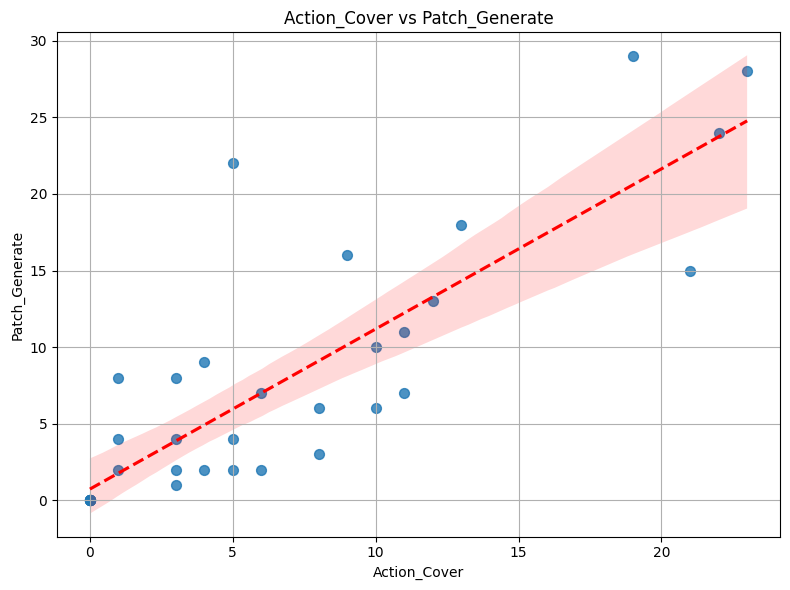

                            OLS Regression Results                            
Dep. Variable:         Patch_Generate   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     78.95
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           2.86e-10
Time:                        11:24:45   Log-Likelihood:                -101.99
No. Observations:                  35   AIC:                             208.0
Df Residuals:                      33   BIC:                             211.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7371      1.088      0.677   

In [ ]:
# 將資料集細分

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 建立資料集（可直接貼上）
data = {
    'APR': ['ACS-Chart','ACS-Closure','ACS-Lang','ACS-Math','ACS-Time',
            'jGenProg-Chart','jGenProg-Closure','jGenProg-Lang','jGenProg-Math','jGenProg-Time',
            'jKali-Chart','jKali-Closure','jKali-Lang','jKali-Math','jKali-Time',
            'jMutRepair-Chart','jMutRepair-Closure','jMutRepair-Lang','jMutRepair-Math','jMutRepair-Time',
            'Nopol-Chart','Nopol-Closure','Nopol-Lang','Nopol-Math','Nopol-Time',
            'SimFix-Chart','SimFix-Closure','SimFix-Lang','SimFix-Math','SimFix-Time',
            'TBar-Chart','TBar-Closure','TBar-Lang','TBar-Math','TBar-Time'],
    'Action_Cover': [4,0,5,9,3,6,0,6,11,0,8,0,5,8,0,1,0,1,1,0,4,0,3,5,3,10,13,12,19,3,11,22,21,23,10],
    'Patch_Generate': [2,0,4,16,1,7,0,2,7,0,6,0,2,3,0,4,0,2,8,0,9,0,4,22,8,10,18,13,29,2,11,24,15,28,6]
}

df = pd.DataFrame(data)

# 計算皮爾森相關係數
corr, p_value = pearsonr(df['Action_Cover'], df['Patch_Generate'])

print(f"皮爾森相關係數 (r): {corr:.4f}")
print(f"p-value: {p_value:.4f}")

# 根據結果解釋
alpha = 0.05
if p_value < alpha:
    print("✅ 拒絕 H₀：覆蓋度與補丁數量有顯著線性相關。")
else:
    print("❌ 無法拒絕 H₀：尚無足夠證據顯示覆蓋度與補丁數量有關聯。")

# 視覺化
plt.figure(figsize=(8,6))
sns.regplot(x='Action_Cover', y='Patch_Generate', data=df, scatter_kws={'s':50}, line_kws={"color":"red", "linestyle":"--"})
plt.title('Action_Cover vs Patch_Generate')
plt.xlabel('Action_Cover')
plt.ylabel('Patch_Generate')
plt.grid(True)
plt.tight_layout()
plt.show()


import statsmodels.api as sm
X = sm.add_constant(df['Action_Cover'])
model = sm.OLS(df['Patch_Generate'], X).fit()
print(model.summary())


皮爾森相關係數 (r): 0.8398
p-value: 0.000000
✅ 拒絕 H₀：Action_Cover 與 Patch_Generate 有顯著線性相關。


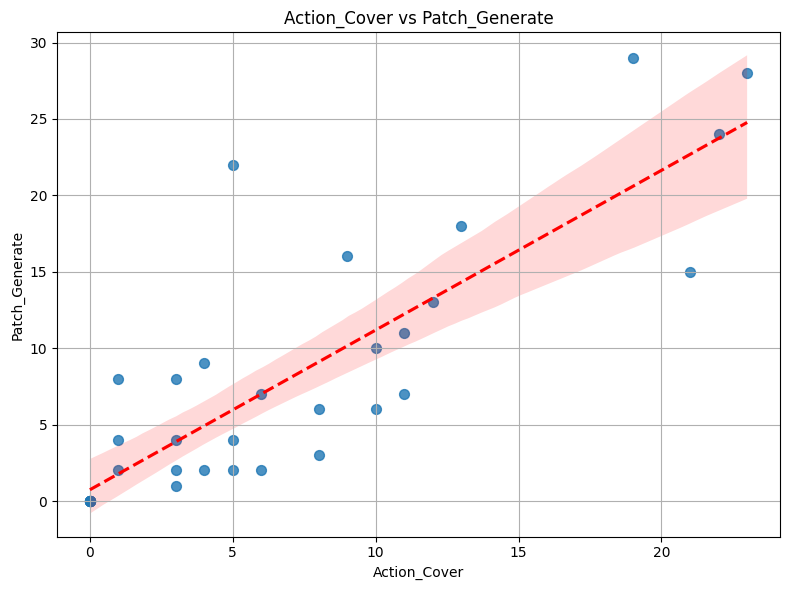

<Axes: xlabel='Action_Cover', ylabel='Patch_Generate'>

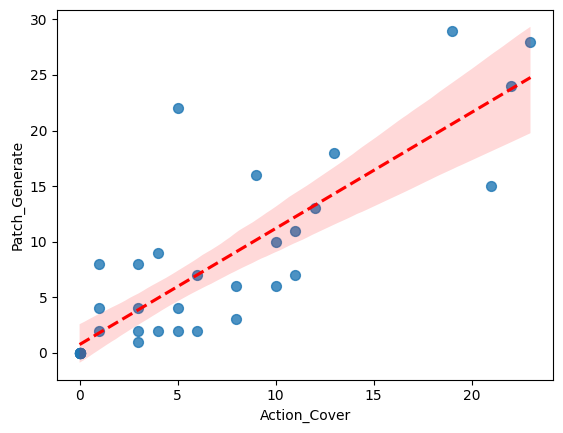

In [ ]:
# 保留補丁為0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 資料：欄位名稱已更新
data = {
    'APR': ['ACS-Chart','ACS-Closure','ACS-Lang','ACS-Math','ACS-Time',
            'jGenProg-Chart','jGenProg-Closure','jGenProg-Lang','jGenProg-Math','jGenProg-Time',
            'jKali-Chart','jKali-Closure','jKali-Lang','jKali-Math','jKali-Time',
            'jMutRepair-Chart','jMutRepair-Closure','jMutRepair-Lang','jMutRepair-Math','jMutRepair-Time',
            'Nopol-Chart','Nopol-Closure','Nopol-Lang','Nopol-Math','Nopol-Time',
            'SimFix-Chart','SimFix-Closure','SimFix-Lang','SimFix-Math','SimFix-Time',
            'TBar-Chart','TBar-Closure','TBar-Lang','TBar-Math','TBar-Time'],
    'Action_Cover': [4,0,5,9,3,6,0,6,11,0,8,0,5,8,0,1,0,1,1,0,4,0,3,5,3,10,13,12,19,3,11,22,21,23,10],
    'Patch_Generate': [2,0,4,16,1,7,0,2,7,0,6,0,2,3,0,4,0,2,8,0,9,0,4,22,8,10,18,13,29,2,11,24,15,28,6]
}

df = pd.DataFrame(data)

# 計算皮爾森相關係數
corr, p_value = pearsonr(df['Action_Cover'], df['Patch_Generate'])

print(f"皮爾森相關係數 (r): {corr:.4f}")
print(f"p-value: {p_value:.6f}")

# 結果解釋
alpha = 0.05
if p_value < alpha:
    print("✅ 拒絕 H₀：Action_Cover 與 Patch_Generate 有顯著線性相關。")
else:
    print("❌ 無法拒絕 H₀：尚無證據顯示兩者有關。")

# 畫圖
plt.figure(figsize=(8,6))
sns.regplot(x='Action_Cover', y='Patch_Generate', data=df,
            scatter_kws={'s':50}, line_kws={"color":"red", "linestyle":"--"})
plt.title('Action_Cover vs Patch_Generate')
plt.xlabel('Action_Cover')
plt.ylabel('Patch_Generate')
plt.grid(True)
plt.tight_layout()
plt.show()

# 加上趨勢
sns.regplot(x='Action_Cover', y='Patch_Generate', data=df,
            scatter_kws={'s':50}, line_kws={"color":"red", "linestyle":"--"})



皮爾森相關係數 (r): 0.7826
p-value: 0.000001
✅ 拒絕 H₀：Action_Cover 與 Patch_Generate 有顯著線性相關。


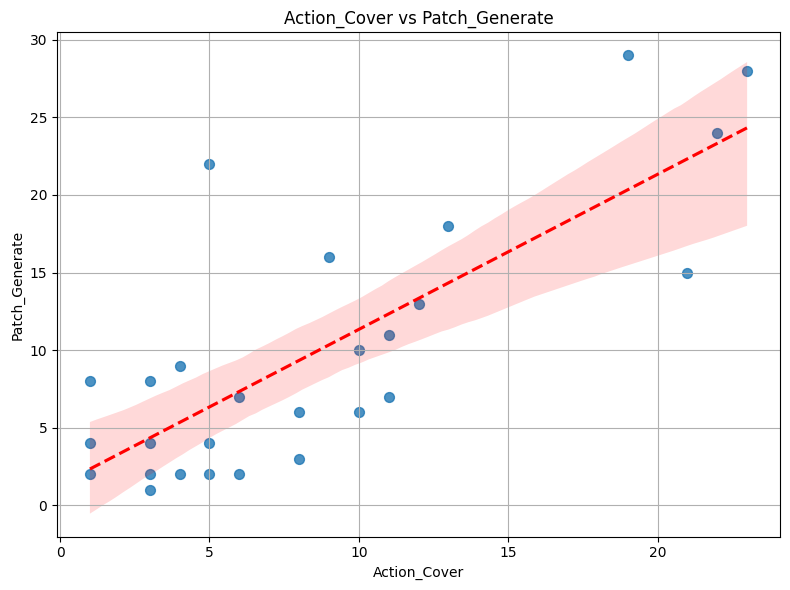

<Axes: xlabel='Action_Cover', ylabel='Patch_Generate'>

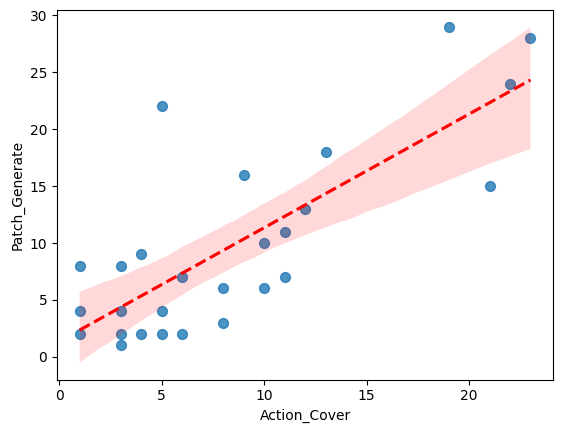

In [ ]:
# 去除補丁為0的問題
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 資料：欄位名稱已更新
data = {
    'APR': [
        'ACS-Chart', 'ACS-Lang', 'ACS-Math', 'ACS-Time',
        'jGenProg-Chart', 'jGenProg-Lang', 'jGenProg-Math',
        'jKali-Chart', 'jKali-Lang', 'jKali-Math',
        'jMutRepair-Chart', 'jMutRepair-Lang', 'jMutRepair-Math',
        'Nopol-Chart', 'Nopol-Lang', 'Nopol-Math', 'Nopol-Time',
        'SimFix-Chart', 'SimFix-Closure', 'SimFix-Lang', 'SimFix-Math', 'SimFix-Time',
        'TBar-Chart', 'TBar-Closure', 'TBar-Lang', 'TBar-Math', 'TBar-Time'
    ],
    'Action_Cover': [
        4, 5, 9, 3,
        6, 6, 11,
        8, 5, 8,
        1, 1, 1,
        4, 3, 5, 3,
        10, 13, 12, 19, 3,
        11, 22, 21, 23, 10
    ],
    'Patch_Generate': [
        2, 4, 16, 1,
        7, 2, 7,
        6, 2, 3,
        4, 2, 8,
        9, 4, 22, 8,
        10, 18, 13, 29, 2,
        11, 24, 15, 28, 6
    ]
}

df = pd.DataFrame(data)

# 計算皮爾森相關係數
corr, p_value = pearsonr(df['Action_Cover'], df['Patch_Generate'])

print(f"皮爾森相關係數 (r): {corr:.4f}")
print(f"p-value: {p_value:.6f}")

# 結果解釋
alpha = 0.05
if p_value < alpha:
    print("✅ 拒絕 H₀：Action_Cover 與 Patch_Generate 有顯著線性相關。")
else:
    print("❌ 無法拒絕 H₀：尚無證據顯示兩者有關。")

# 畫圖
plt.figure(figsize=(8,6))
sns.regplot(x='Action_Cover', y='Patch_Generate', data=df,
            scatter_kws={'s':50}, line_kws={"color":"red", "linestyle":"--"})
plt.title('Action_Cover vs Patch_Generate')
plt.xlabel('Action_Cover')
plt.ylabel('Patch_Generate')
plt.grid(True)
plt.tight_layout()
plt.show()

# 加上趨勢
sns.regplot(x='Action_Cover', y='Patch_Generate', data=df,
            scatter_kws={'s':50}, line_kws={"color":"red", "linestyle":"--"})

